In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
import pandas as pd
from scipy.stats import entropy
from scipy.sparse.csgraph import connected_components
from collections import Counter
from sklearn.decomposition import PCA

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [85]:
import sys
sys.path.append("../code/")

In [86]:
from RBmodel.main import RBmodel

### Encode the network

In [87]:
J = np.array([
    [ 0, 1, 0, 0, 0, 0, 0, 0, 0,-1],
    [ 0, 0, 1, 0, 0, 0, 0, 0,-1, 0],
    [ 0, 0, 0, 1, 0, 0, 0,-1, 0, 0],
    [ 0, 0, 0, 0, 1, 0,-1, 0, 0, 0],
    [ 0, 0, 0, 0, 0,-1, 0, 0, 0, 0],
    [ 0, 0, 0, 0,-1, 0, 1, 0, 0, 0],
    [ 0, 0, 0,-1, 0, 0, 0, 1, 0, 0],
    [ 0, 0,-1, 0, 0, 0, 0, 0, 1, 0],
    [ 0,-1, 0, 0, 0, 0, 0, 0, 0, 1],
    [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             ])

G = nx.DiGraph(J)

pos = np.array([[1,2,3,4,5,5,4,3,2,1], [1,1,1,1,1,0,0,0,0,0]]).T

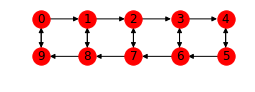

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(4,1))
nx.draw_networkx(G, pos=pos, )
ax.set_axis_off()

### Run dynamics

In [89]:
net = RBmodel(N=10, J=J, maxT=1000)

In [90]:
net.runs(n_runs=15000)

In [91]:
reindex = [0, 1, 2, 3, 4, 9, 8, 7, 6]
nss = net.ss[reindex]

### Plot abundancies

In [106]:
counter = Counter(["".join(x) for x in ((net.ss+1)/2).astype(int).astype(str).values]).most_common()
labels, counts = list(zip(*counter))
counts = np.array(counts)/np.sum(np.array(counts))

/home/fontclos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


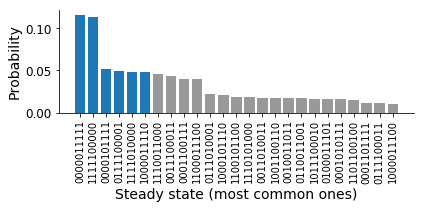

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(6,3), tight_layout=True)
ax.bar(range(6, 25), counts[6:25], color="0.6")
ax.bar(range(6), counts[:6])
ax.set_xticks(range(25))
ax.set_xticklabels(labels, rotation=90, fontsize=10);
ax.set_xlabel("Steady state (most common ones)")
ax.set_ylabel("Probability");

### Plot PCA density projection with added noise

In [133]:
OX = net.ss.copy().values
OX += np.random.normal(scale=0.3, size=OX.shape)
X = PCA(n_components=2).fit_transform(OX)

Text(0,0.5,'PCA1')

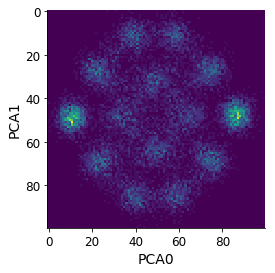

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
H, _, _ = np.histogram2d(*X.T, bins=100)
ax.imshow(H.T)
ax.set_xlabel("PCA0")
ax.set_ylabel("PCA1")

### PCA scatter plot colored by "cluster"

In [ ]:
ss_str = pd.Series(["".join(x) for x in ((net.ss+1)/2).astype(int).astype(str).values])
reduced_index = ss_str.loc[ss_str.apply(lambda x:x in ss_str.value_counts()[:6])].index

In [ ]:
reduced_index

TypeError: You have to supply one of 'by' and 'level'

/home/fontclos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


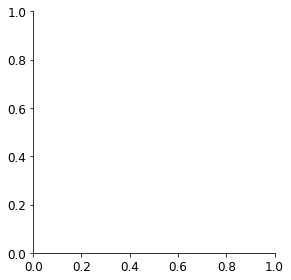

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.set_aspect(1)
for lab, df in net.ss.loc[reduced_index].groupby():
    ax.scatter(*X[df.index].T, s=5, alpha=0.1)
